In [43]:
#Este analisis verifica si la cercanía la linea A de subte afecta el precio.

import pandas as pd
import numpy as np
#import shapely
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

#Cargamos los datos que ya tenemos procesados

#Datos procesados
filteredData = pd.read_csv('dataFiltrada/datosCapital.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
data = filteredData[['property_type','barrio','rooms','price','lat', 'lon']]


#Elimino NAs
data.dropna(inplace=True)


#Me quedo con las propiedades que atraviesan las distintas lineas
propRecorridoA = data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Flores')|
                        data.barrio.str.contains('Caballito')]

propRecorridoB= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Villa Crespo')|
                        data.barrio.str.contains('Chacarita')]

propRecorridoC= data[data.barrio.str.contains('San Nicolas') |
                        data.barrio.str.contains('Monserrat')|
                        data.barrio.str.contains('Retiro')|
                        data.barrio.str.contains('Constitucion')]

propRecorridoD= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('San Nicolas')|
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('Recoleta')|
                        data.barrio.str.contains('Palermo')|
                        data.barrio.str.contains('Belgrano')|
                        data.barrio.str.contains('Barrio Norte')]

propRecorridoE= data[data.barrio.str.contains('Monserrat') |
                        data.barrio.str.contains('Constitucion')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Parque Chacabuco')|
                        data.barrio.str.contains('Parque Avellaneda')]

propRecorridoH= data[data.barrio.str.contains('Parque Patricios') |
                        data.barrio.str.contains('Balvanera')|
                        data.barrio.str.contains('San Cristobal')|
                        data.barrio.str.contains('Boedo')|
                        data.barrio.str.contains('Almagro')|
                        data.barrio.str.contains('Recoleta')]


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


11683

In [45]:
#Cargamos el csv de los subtes
df = pd.read_csv('/home/santiago/Desktop/Academico/UBA/Introduccion a los Sistemas Inteligentes(75.50)/TP Final/TP/Git/TPSistemasInteligentes/subtes.csv', encoding = '"ISO-8859-1"')

#Discriminamos por linea
estacionesA = df[df['LINEA'] == 'A']
estacionesB = df[df['LINEA'] == 'B']
estacionesC = df[df['LINEA'] == 'C']
estacionesD = df[df['LINEA'] == 'D']
estacionesE = df[df['LINEA'] == 'E']
estacionesH = df[df['LINEA'] == 'H']


In [30]:
#Peru
peru_lon = estacionesA.loc[estacionesA.index[0],'X']
peru_lat = estacionesA.loc[estacionesA.index[0],'Y']
propRecorridoA['peru_lon'] = peru_lon
propRecorridoA['peru_lat'] = peru_lat

#Piedras
piedras_lon = estacionesA.loc[estacionesA.index[1],'X']
piedras_lat = estacionesA.loc[estacionesA.index[1],'Y']
propRecorridoA['piedras_lon'] = piedras_lon
propRecorridoA['piedras_lat'] = piedras_lat
#Lima
lima_lon = estacionesA.loc[estacionesA.index[2],'X']
lima_lat = estacionesA.loc[estacionesA.index[2],'Y']
propRecorridoA['lima_lon'] = lima_lon
propRecorridoA['lima_lat'] = lima_lat
#Saenz
saenz_lon = estacionesA.loc[estacionesA.index[3],'X']
saenz_lat = estacionesA.loc[estacionesA.index[3],'Y']
propRecorridoA['saenz_lon'] = saenz_lon
propRecorridoA['saenz_lat'] = saenz_lat
#Congreso
congreso_lon = estacionesA.loc[estacionesA.index[4],'X']
congreso_lat = estacionesA.loc[estacionesA.index[4],'Y']
propRecorridoA['congreso_lon'] = congreso_lon
propRecorridoA['congreso_lat'] = congreso_lat
#Pasco
pasco_lon = estacionesA.loc[estacionesA.index[5],'X']
pasco_lat = estacionesA.loc[estacionesA.index[5],'Y']
propRecorridoA['pasco_lon'] = pasco_lon
propRecorridoA['pasco_lat'] = pasco_lat
#Alberti
alberti_lon = estacionesA.loc[estacionesA.index[6],'X']
alberti_lat = estacionesA.loc[estacionesA.index[6],'Y']
propRecorridoA['alberti_lon'] = alberti_lon
propRecorridoA['alberti_lat'] = alberti_lat
#Miserere
miserere_lon = estacionesA.loc[estacionesA.index[7],'X']
miserere_lat = estacionesA.loc[estacionesA.index[7],'Y']
propRecorridoA['miserere_lon'] = miserere_lon
propRecorridoA['miserere_lat'] = miserere_lat
#Loria
loria_lon = estacionesA.loc[estacionesA.index[8],'X']
loria_lat = estacionesA.loc[estacionesA.index[8],'Y']
propRecorridoA['loria_lon'] = loria_lon
propRecorridoA['loria_lat'] = loria_lat
#Castro Barros
castroBarros_lon = estacionesA.loc[estacionesA.index[9],'X']
castroBarros_lat = estacionesA.loc[estacionesA.index[9],'Y']
propRecorridoA['castroBarros_lon'] = castroBarros_lon
propRecorridoA['castroBarros_lat'] = castroBarros_lat
#Rio de Janeiro
janeiro_lon = estacionesA.loc[estacionesA.index[10],'X']
janeiro_lat = estacionesA.loc[estacionesA.index[10],'Y']
propRecorridoA['janeiro_lon'] = janeiro_lon
propRecorridoA['janeiro_lat'] = janeiro_lat
#Acoyte
acoyte_lon = estacionesA.loc[estacionesA.index[11],'X']
acoyte_lat = estacionesA.loc[estacionesA.index[11],'Y']
propRecorridoA['acoyte_lon'] = acoyte_lon
propRecorridoA['acoyte_lat'] = acoyte_lat
#Primera Junta
primeraJunta_lon = estacionesA.loc[estacionesA.index[12],'X']
primeraJunta_lat = estacionesA.loc[estacionesA.index[12],'Y']
propRecorridoA['primeraJunta_lon'] = primeraJunta_lon
propRecorridoA['primeraJunta_lat'] = primeraJunta_lat
#Plaza de mayo
plazaMayo_lon = estacionesA.loc[estacionesA.index[13],'X']
plazaMayo_lat = estacionesA.loc[estacionesA.index[13],'Y']
propRecorridoA['plazaMayo_lon'] = plazaMayo_lon
propRecorridoA['plazaMayo_lat'] = plazaMayo_lat
#Carabobo
carabobo_lon = estacionesA.loc[estacionesA.index[14],'X']
carabobo_lat = estacionesA.loc[estacionesA.index[14],'Y']
propRecorridoA['carabobo_lon'] = carabobo_lon
propRecorridoA['carabobo_lat'] = carabobo_lat
#Puan
puan_lon = estacionesA.loc[estacionesA.index[15],'X']
puan_lat = estacionesA.loc[estacionesA.index[15],'Y']
propRecorridoA['puan_lon'] = puan_lon
propRecorridoA['puan_lat'] = puan_lat
#San Pedrito
sanPedrito_lon = estacionesA.loc[estacionesA.index[16],'X']
sanPedrito_lat = estacionesA.loc[estacionesA.index[16],'Y']
propRecorridoA['sanPedrito_lon'] = sanPedrito_lon
propRecorridoA['sanPedrito_lat'] = sanPedrito_lat
#Flores
flores_lon = estacionesA.loc[estacionesA.index[17],'X']
flores_lat = estacionesA.loc[estacionesA.index[17],'Y']
propRecorridoA['flores_lon'] = flores_lon
propRecorridoA['flores_lat'] = flores_lat


propRecorridoA.info()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13409 entries, 0 to 73628
Data columns (total 42 columns):
property_type       13409 non-null object
barrio              13409 non-null object
rooms               13409 non-null float64
price               13409 non-null float64
lat                 13409 non-null float64
lon                 13409 non-null float64
peru_lon            13409 non-null float64
peru_lat            13409 non-null float64
piedras_lon         13409 non-null float64
piedras_lat         13409 non-null float64
lima_lon            13409 non-null float64
lima_lat            13409 non-null float64
saenz_lon           13409 non-null float64
saenz_lat           13409 non-null float64
congreso_lon        13409 non-null float64
congreso_lat        13409 non-null float64
pasco_lon           13409 non-null float64
pasco_lat           13409 non-null float64
alberti_lon         13409 non-null float64
alberti_lat         13409 non-null float64
miserere_lon        13409 non-nul

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
#Calculamos la distancia de cada propiedad a cada estacion de subte de la linea A
#Peru
propRecorridoA['dist_peru'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['peru_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['peru_lat'])
#Piedras
propRecorridoA['dist_piedras'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['piedras_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['piedras_lat'])
#Lima
propRecorridoA['dist_lima'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['lima_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['lima_lat'])
#Saenz
propRecorridoA['dist_saenz'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['saenz_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['saenz_lat'])
#Congreso
propRecorridoA['dist_congreso'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['congreso_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['congreso_lat'])
#Pasco
propRecorridoA['dist_pasco'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['pasco_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['pasco_lat'])
#Alberti
propRecorridoA['dist_alberti'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['alberti_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['alberti_lat'])
#Miserere
propRecorridoA['dist_miserere'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['miserere_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['miserere_lat'])
#Loria
propRecorridoA['dist_loria'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['loria_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['loria_lat'])
#Castro Barros
propRecorridoA['dist_castroBarros'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['castroBarros_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['castroBarros_lat'])
#Janeiro
propRecorridoA['dist_janeiro'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['janeiro_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['janeiro_lat'])
#Acoyte
propRecorridoA['dist_acoyte'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['acoyte_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['acoyte_lat'])
#Primera Junta
propRecorridoA['dist_primeraJunta'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['primeraJunta_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['primeraJunta_lat'])
#Plaza de Mayo
propRecorridoA['dist_plazaMayo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['plazaMayo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['plazaMayo_lat'])
#Carabobo
propRecorridoA['dist_carabobo'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['carabobo_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['carabobo_lat'])
#Puan
propRecorridoA['dist_puan'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['puan_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['puan_lat'])
#San pedrito
propRecorridoA['dist_sanPedrito'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['sanPedrito_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['sanPedrito_lat'])
#FLores
propRecorridoA['dist_flores'] = np.absolute(propRecorridoA['lon'] - propRecorridoA['flores_lon'])+ np.absolute(propRecorridoA['lat'] - propRecorridoA['flores_lat'])



/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,property_type,barrio,rooms,price,lat,lon,peru_lon,peru_lat,piedras_lon,piedras_lat,...,dist_loria,dist_castroBarros,dist_janeiro,dist_acoyte,dist_primeraJunta,dist_plazaMayo,dist_carabobo,dist_puan,dist_sanPedrito,dist_flores
73505,PH,Balvanera,11.0,450000.0,-34.613458,-58.403050,-58.374268,-34.608559,-58.379085,-34.608882,...,0.014812,0.020454,0.028198,0.038200,0.045075,0.036729,0.066868,0.055669,0.083839,0.076120
73517,Departamento,Almagro,6.0,456000.0,-34.611293,-58.418427,-58.374268,-34.608559,-58.379085,-34.608882,...,0.003753,0.003866,0.014986,0.024988,0.031863,0.049941,0.053656,0.042456,0.070626,0.062907
73522,Departamento,Caballito,5.0,750000.0,-34.619454,-58.434475,-58.374268,-34.608559,-58.379085,-34.608882,...,0.027961,0.020343,0.009223,0.003128,0.007654,0.074150,0.029448,0.018248,0.046418,0.038699
73574,PH,Floresta,9.0,395000.0,-34.621997,-58.488271,-58.374268,-34.608559,-58.379085,-34.608882,...,0.084301,0.076683,0.065563,0.055560,0.048686,0.130490,0.036231,0.041155,0.027341,0.031821
73628,Departamento,Flores,6.0,460000.0,-34.632802,-58.458392,-58.374268,-34.608559,-58.379085,-34.608882,...,0.065227,0.057608,0.046488,0.036486,0.029611,0.111415,0.007818,0.019017,0.013343,0.008864


In [34]:
#Nos quedamos con la menor distancia para cada propiedad
propRecorridoA['min_dist_subte_A'] =propRecorridoA.loc[:,['dist_peru','dist_loria','dist_castroBarros','dist_janeiro',
                                                  'dist_piedras','dist_lima','dist_saenz','dist_pasco','dist_congreso',
                                                 'dist_alberti','dist_miserere','dist_acoyte','dist_primeraJunta',
                                                  'dis_plazaMayo','dist_carabobo','dist_puan','dist_sanPedrito','dist_flores']].min(axis=1)
propRecorridoA.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,property_type,barrio,rooms,price,lat,lon,peru_lon,peru_lat,piedras_lon,piedras_lat,...,dist_janeiro,dist_acoyte,dist_primeraJunta,dist_plazaMayo,dist_carabobo,dist_puan,dist_sanPedrito,dist_flores,min_dist,min_dist_subte_A
0,PH,Flores,3.0,125000.0,-34.655647,-58.496525,-58.374268,-34.608559,-58.379085,-34.608882,...,0.107466,0.097464,0.090589,0.172393,0.068796,0.079995,0.051825,0.059544,0.051825,0.051825
9,Departamento,Floresta,2.0,82000.0,-34.631462,-58.482067,-58.374268,-34.608559,-58.379085,-34.608882,...,0.068823,0.058821,0.051946,0.133750,0.030153,0.041352,0.013182,0.020901,0.013182,0.013182
10,Departamento,Floresta,2.0,87000.0,-34.631199,-58.481384,-58.374268,-34.608559,-58.379085,-34.608882,...,0.067877,0.057875,0.051000,0.132804,0.029207,0.040406,0.012236,0.019955,0.012236,0.012236
19,Departamento,Caballito,3.0,137000.0,-34.624594,-58.435902,-58.374268,-34.608559,-58.379085,-34.608882,...,0.015790,0.006841,0.009465,0.080717,0.022881,0.013811,0.039851,0.032132,0.006841,0.006841
20,Departamento,Caballito,3.0,218000.0,-34.619450,-58.452117,-58.374268,-34.608559,-58.379085,-34.608882,...,0.026861,0.016858,0.011895,0.091788,0.011810,0.007549,0.028780,0.021061,0.007549,0.007549


In [36]:
finalRecorridoA = propRecorridoA[['property_type','barrio','rooms','price','lat', 'lon', 'min_dist_subte_A']]
finalRecorridoA.sample(5)

,property_type,barrio,rooms,price,lat,lon,min_dist_subte_A
10634,Departamento,Balvanera,2.0,63000.0,-34.614722,-58.409612,0.007810
51316,Departamento,Balvanera,2.0,92000.0,-34.606444,-58.405364,0.004716
53180,Departamento,Caballito,3.0,150000.0,-34.611290,-58.453860,0.017452
56051,Departamento,Caballito,5.0,481700.0,-34.627735,-58.430333,0.013362
68800,Departamento,Floresta,3.0,73000.0,-34.628247,-58.484411,0.017232


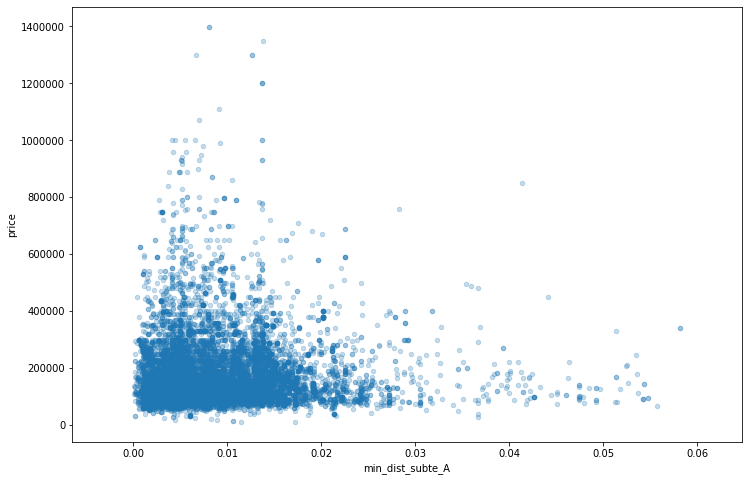

In [38]:
%matplotlib inline
propRecorridoA1 = finalRecorridoA[finalRecorridoA['price']< 1500000]
propRecorridoA2 = propRecorridoA1[propRecorridoA1['min_dist_subte_A']< 0.06]
propRecorridoA2.plot.scatter('min_dist_subte_A', 'price',alpha=0.25, figsize=(12,8))

In [46]:
#florida
florida_lon = estacionesB.loc[estacionesB.index[0],'X']
florida_lat = estacionesB.loc[estacionesB.index[0],'Y']
propRecorridoB['florida_lon'] = florida_lon
propRecorridoB['florida_lat'] = florida_lat

#C.Pellegrini
pellegrini_lon = estacionesB.loc[estacionesB.index[1],'X']
pellegrini_lat = estacionesB.loc[estacionesB.index[1],'Y']
propRecorridoB['pellegrini_lon'] = pellegrini_lon
propRecorridoB['pellegrini_lat'] = pellegrini_lat

#Uruguay
uruguay_lon = estacionesB.loc[estacionesB.index[2],'X']
uruguay_lat = estacionesB.loc[estacionesB.index[2],'Y']
propRecorridoB['uruguay_lon'] = uruguay_lon
propRecorridoB['uruguay_lat'] = uruguay_lat


#Callao
callao_lon = estacionesB.loc[estacionesB.index[3],'X']
callao_lat = estacionesB.loc[estacionesB.index[3],'Y']
propRecorridoB['callao_lon'] = callao_lon
propRecorridoB['callao_lat'] = callao_lat

#Pasteur
pasteur_lon = estacionesB.loc[estacionesB.index[4],'X']
pasteur_lat = estacionesB.loc[estacionesB.index[4],'Y']
propRecorridoB['pasteur_lon'] = pasteur_lon
propRecorridoB['pasteur_lat'] = pasteur_lat

#Pueyrredon
pueyrredon_lon = estacionesB.loc[estacionesB.index[5],'X']
pueyrredon_lat = estacionesB.loc[estacionesB.index[5],'Y']
propRecorridoB['pueyrredon_lon'] = pueyrredon_lon
propRecorridoB['pueyrredon_lat'] = pueyrredon_lat

#Carlos Gardel
carlosGardel_lon = estacionesB.loc[estacionesB.index[6],'X']
carlosGardel_lat = estacionesB.loc[estacionesB.index[6],'Y']
propRecorridoB['carlosGardel_lon'] = carlosGardel_lon
propRecorridoB['carlosGardel_lat'] = carlosGardel_lat

#Medrano
medrano_lon = estacionesB.loc[estacionesB.index[7],'X']
medrano_lat = estacionesB.loc[estacionesB.index[7],'Y']
propRecorridoB['medrano_lon'] = medrano_lon
propRecorridoB['medrano_lat'] = medrano_lat

#Angel Gallardo
gallardo_lon = estacionesB.loc[estacionesB.index[8],'X']
gallardo_lat = estacionesB.loc[estacionesB.index[8],'Y']
propRecorridoB['gallardo_lon'] = gallardo_lon
propRecorridoB['gallardo_lat'] = gallardo_lat

#Malabia
malabia_lon = estacionesB.loc[estacionesB.index[9],'X']
malabia_lat = estacionesB.loc[estacionesB.index[9],'Y']
propRecorridoB['malabia_lon'] = malabia_lon
propRecorridoB['malabia_lat'] = malabia_lat

#Dorrego
dorrego_lon = estacionesB.loc[estacionesB.index[10],'X']
dorrego_lat = estacionesB.loc[estacionesB.index[10],'Y']
propRecorridoB['dorrego_lon'] = dorrego_lon
propRecorridoB['dorrego_lat'] = dorrego_lat


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [47]:
#Florida
propRecorridoB['dist_florida'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['florida_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['florida_lat'])

#Pellegrini
propRecorridoB['dist_pellegrini'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pellegrini_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pellegrini_lat'])

#Uruguay
propRecorridoB['dist_uruguay'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['uruguay_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['uruguay_lat'])

#Callao
propRecorridoB['dist_callao'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['callao_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['callao_lat'])

#Pasteur
propRecorridoB['dist_pasteur'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pasteur_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pasteur_lat'])

#Pueyrredon
propRecorridoB['dist_pueyrredon'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['pueyrredon_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['pueyrredon_lat'])

#Carlos Gardel
propRecorridoB['dist_carlosGardel'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['carlosGardel_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['carlosGardel_lat'])

#Medrano
propRecorridoB['dist_medrano'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['medrano_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['medrano_lat'])

#Angel Gallardo
propRecorridoB['dist_gallardo'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['gallardo_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['gallardo_lat'])

#Malabia
propRecorridoB['dist_malabia'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['malabia_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['malabia_lat'])

#Dorrego
propRecorridoB['dist_dorrego'] = np.absolute(propRecorridoB['lon'] - propRecorridoB['dorrego_lon'])+ np.absolute(propRecorridoB['lat'] - propRecorridoB['dorrego_lat'])


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [51]:
propRecorridoB['min_dist_subte_B'] =propRecorridoB.loc[:,['dist_florida','dist_pellegrini','dist_uruguay','dist_callao',
                                                  'dist_pasteur','dist_pueyrredon','dist_carlosGardel','dist_medrano','dist_angelGallardo',
                                                 'dist_malabia','dist_dorrego']].min(axis=1)
propRecorridoB.head()


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,property_type,barrio,rooms,price,lat,lon,florida_lon,florida_lat,pellegrini_lon,pellegrini_lat,...,dist_uruguay,dist_callao,dist_pasteur,dist_pueyrredon,dist_carlosGardel,dist_medrano,dist_gallardo,dist_malabia,dist_dorrego,min_dist_subte_B
21,Departamento,Chacarita,2.0,95000.0,-34.589787,-58.449482,-58.375072,-34.603297,-58.380715,-34.603637,...,0.076492,0.071800,0.064864,0.058877,0.052012,0.041897,0.030583,0.018891,0.003840,0.003840
25,Departamento,Villa Crespo,4.0,208000.0,-34.601303,-58.439503,-58.375072,-34.603297,-58.380715,-34.603637,...,0.054997,0.050305,0.043369,0.037382,0.030517,0.020402,0.009088,0.002604,0.017655,0.002604
26,Departamento,Villa Crespo,1.0,93000.0,-34.604028,-58.455646,-58.375072,-34.603297,-58.380715,-34.603637,...,0.068415,0.063723,0.056786,0.050799,0.043934,0.035547,0.026238,0.020935,0.020383,0.020383
50,Departamento,Almagro,1.0,95500.0,-34.606584,-58.430829,-58.375072,-34.603297,-58.380715,-34.603637,...,0.046024,0.040679,0.033296,0.027433,0.021571,0.013286,0.004866,0.016559,0.031610,0.013286
216,Departamento,Almagro,1.0,118000.0,-34.598219,-58.430038,-58.375072,-34.603297,-58.380715,-34.603637,...,0.048616,0.043924,0.036988,0.031000,0.024136,0.014021,0.005179,0.010482,0.024036,0.010482


In [81]:
finalRecorridoB = propRecorridoB[['property_type','barrio','rooms','price','lat', 'lon', 'min_dist_subte_B']]
finalRecorridoB.sample(5)

,property_type,barrio,rooms,price,lat,lon,min_dist_subte_B
46250,PH,Almagro,3.0,149000.0,-34.603779,-58.419855,0.001722
7924,Departamento,Almagro,2.0,145000.0,-34.608283,-58.427832,0.011987
18703,Departamento,Almagro,2.0,85000.0,-34.620390,-58.410710,0.017363
29802,Departamento,Almagro,3.0,202375.0,-34.600731,-58.430009,0.011480
28349,Departamento,Almagro,4.0,229000.0,-34.602911,-58.418119,0.003097


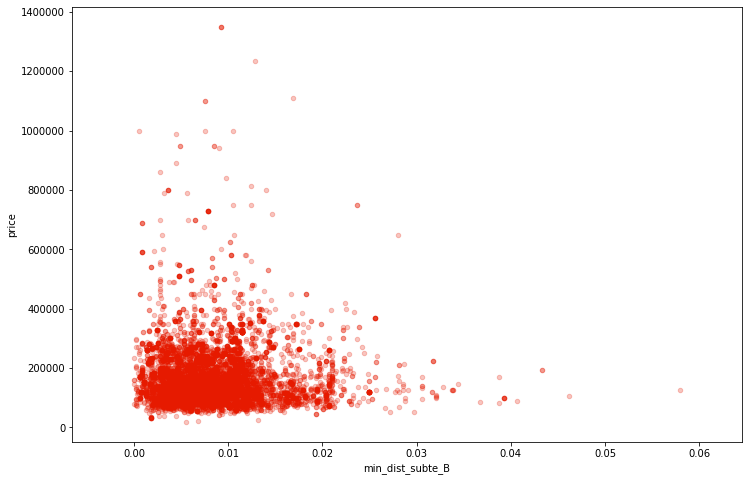

In [82]:
%matplotlib inline
propRecorridoB1 = finalRecorridoB[finalRecorridoB['price']< 1500000]
propRecorridoB2 = propRecorridoB1[propRecorridoB1['min_dist_subte_B']< 0.06]
propRecorridoB2.plot.scatter('min_dist_subte_B', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.1,0.0))

In [75]:
#AHORA LA LINEA C
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [77]:

for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoC['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [83]:
propRecorridoC['min_dist_subte_C'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)

finalRecorridoC = propRecorridoC[['property_type','barrio','rooms','price','lat', 'lon','min_dist_subte_C']]
finalRecorridoC.sample(5)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property_type,barrio,rooms,price,lat,lon,min_dist_subte_C
20176,Departamento,Monserrat,2.0,99000.0,-34.613056,-58.383052,243.653176
28226,Departamento,Retiro,1.0,95000.0,-34.601447,-58.378208,36.277821
17285,Departamento,Retiro,1.0,77738.0,-34.598529,-58.378175,360.513645
36110,Departamento,Monserrat,2.0,110000.0,-34.617078,-58.393612,1235.608848
962,Departamento,Monserrat,1.0,61600.0,-34.618772,-58.388855,797.852066


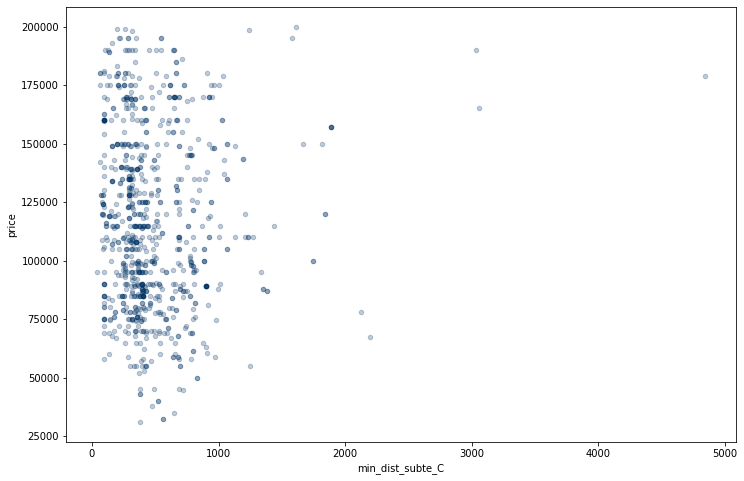

In [100]:
%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 200000]
#propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist']< 0.03]
propRecorridoC1.plot.scatter('min_dist_subte_C', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.2,0.4))

In [101]:
#LINEA D
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [112]:
propRecorridoD['min_dist_subte_D'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
finalRecorridoD = propRecorridoD[['property_type','barrio','rooms','price','lat', 'lon','min_dist_subte_D']]
finalRecorridoD.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,barrio,rooms,price,lat,lon,min_dist_subte_D
5,Departamento,Palermo,4.0,1420000.0,-34.565168,-58.434490,1076.776565
6,Departamento,Palermo,3.0,379000.0,-34.594234,-58.421823,1143.797243
23,Departamento,Barrio Norte,3.0,219000.0,-34.591747,-58.409187,185.951327
39,PH,Palermo,4.0,446000.0,-34.588918,-58.426402,961.459539
40,Casa,Belgrano,5.0,1100000.0,-34.544653,-58.474374,1643.548318


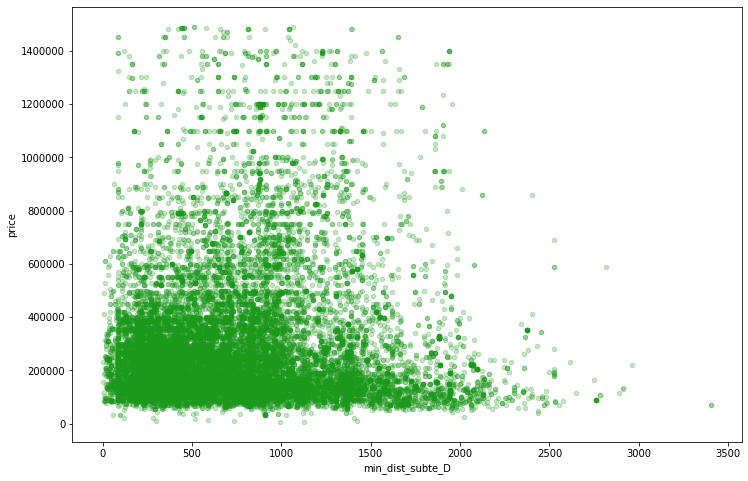

In [105]:
%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 1500000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist_subte_D']< 3500]
propRecorridoD2.plot.scatter('min_dist_subte_D', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))

In [106]:
#LINEA E
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1


/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [114]:
propRecorridoE['min_dist_subte_E'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
finalRecorridoE = propRecorridoE[['property_type','barrio','rooms','price','lat', 'lon','min_dist_subte_E']]
finalRecorridoE.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,barrio,rooms,price,lat,lon,min_dist_subte_E
43,Oficina,Monserrat,5.0,220000.0,-34.613621,-58.368071,707.986734
367,Departamento,Parque Chacabuco,2.0,75000.0,-34.640587,-58.438446,1115.050494
386,Casa,San Cristobal,3.0,250000.0,-34.619417,-58.393564,412.584345
387,Casa,Parque Chacabuco,3.0,750000.0,-34.639462,-58.438427,997.192940
389,Casa,Parque Avellaneda,3.0,260000.0,-34.651234,-58.476607,1627.568569


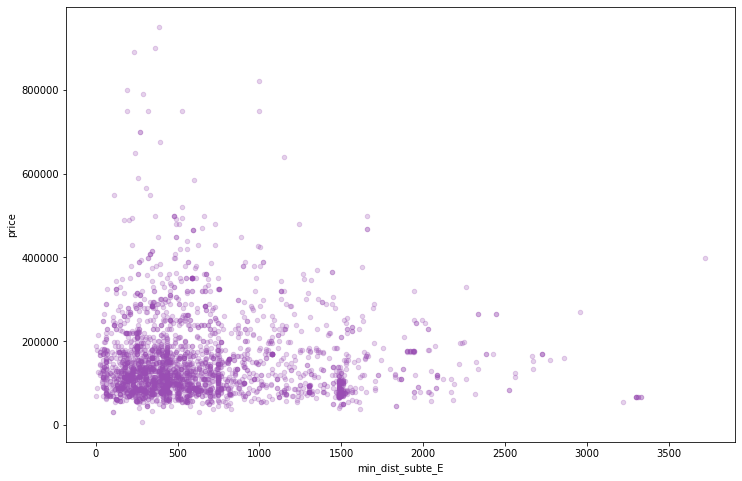

In [116]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist_subte_E']< 4000]
propRecorridoE2.plot.scatter('min_dist_subte_E', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))

In [117]:
#LINEA H
i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [120]:
propRecorridoH['min_dist_subte_H'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
finalRecorridoH = propRecorridoH[['property_type','barrio','rooms','price','lat', 'lon','min_dist_subte_H']]
finalRecorridoH.head()

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,barrio,rooms,price,lat,lon,min_dist_subte_H
50,Departamento,Almagro,1.0,95500.0,-34.606584,-58.430829,2284.696044
79,Departamento,Recoleta,1.0,95000.0,-34.587622,-58.401619,403.607092
80,Departamento,Recoleta,1.0,169900.0,-34.592895,-58.385818,1205.989345
216,Departamento,Almagro,1.0,118000.0,-34.598219,-58.430038,2356.663848
217,Departamento,Almagro,1.0,69000.0,-34.600566,-58.426718,1995.384535


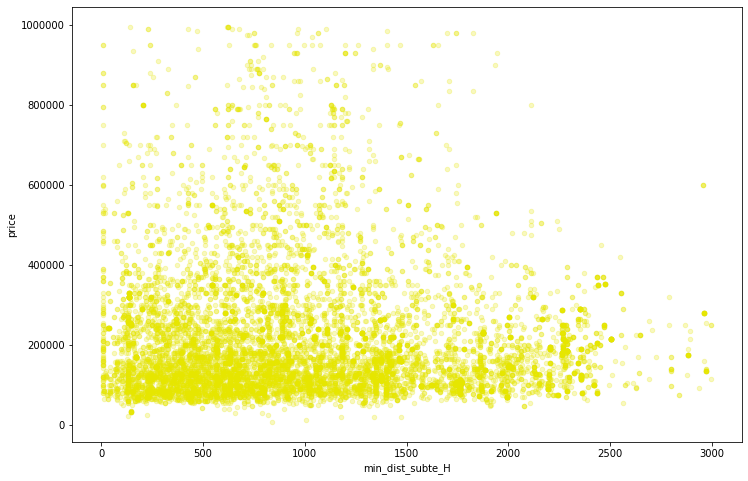

In [122]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist_subte_H']< 3000]
propRecorridoH2.plot.scatter('min_dist_subte_H', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))

In [133]:
final = pd.concat([finalRecorridoA, finalRecorridoB, finalRecorridoC, finalRecorridoD, finalRecorridoE, finalRecorridoH])
final.head(10)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,barrio,lat,lon,min_dist_subte_A,min_dist_subte_B,min_dist_subte_C,min_dist_subte_D,min_dist_subte_E,min_dist_subte_H,price,property_type,rooms
0,Flores,-34.655647,-58.496525,0.051825,NaN,NaN,NaN,NaN,NaN,125000.0,PH,3.0
9,Floresta,-34.631462,-58.482067,0.013182,NaN,NaN,NaN,NaN,NaN,82000.0,Departamento,2.0
10,Floresta,-34.631199,-58.481384,0.012236,NaN,NaN,NaN,NaN,NaN,87000.0,Departamento,2.0
19,Caballito,-34.624594,-58.435902,0.006841,NaN,NaN,NaN,NaN,NaN,137000.0,Departamento,3.0
20,Caballito,-34.619450,-58.452117,0.007549,NaN,NaN,NaN,NaN,NaN,218000.0,Departamento,3.0
37,Flores,-34.619179,-58.468379,0.012789,NaN,NaN,NaN,NaN,NaN,130000.0,PH,2.0
43,Monserrat,-34.613621,-58.368071,0.011259,NaN,NaN,NaN,NaN,NaN,220000.0,Oficina,5.0
45,Flores,-34.645207,-58.456974,0.018805,NaN,NaN,NaN,NaN,NaN,58000.0,Departamento,3.0
50,Almagro,-34.606584,-58.430829,0.009950,0.013286,NaN,NaN,NaN,NaN,95500.0,Departamento,1.0
85,Caballito,-34.619383,-58.441864,0.001709,NaN,NaN,NaN,NaN,NaN,180000.0,Departamento,3.0


In [138]:
#Me quedo con la distancia minima de cada propiedad a cualquier subte (si esta cerca de 2, me quedo con el mas cercano)
final['min_dist_subte'] =final.loc[:,['min_dist_subte_A','min_dist_subte_B','min_dist_subte_C','min_dist_subte_D','min_dist_subte_E','min_dist_subte_H']].min(axis=1)
dmin = final[['property_type','barrio','rooms','price','lat', 'lon','min_dist_subte']]
dmin.head()

,property_type,barrio,rooms,price,lat,lon,min_dist_subte
0,PH,Flores,3.0,125000.0,-34.655647,-58.496525,0.051825
9,Departamento,Floresta,2.0,82000.0,-34.631462,-58.482067,0.013182
10,Departamento,Floresta,2.0,87000.0,-34.631199,-58.481384,0.012236
19,Departamento,Caballito,3.0,137000.0,-34.624594,-58.435902,0.006841
20,Departamento,Caballito,3.0,218000.0,-34.619450,-58.452117,0.007549


In [142]:
#Grafico la relacion precio vs distancia a CUALQUIER subte
%matplotlib inline
dmin1 = dmin[dmin,dmin['price']< 1000000]
dmin2 = dmin1[dmin1['min_dist_subte']< 3000]
dmin2.plot.scatter('min_dist_subte', 'price',alpha=0.25, figsize=(12,8), color=(0.0,0.0,0.0))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().